<h1><div align="center">Deep Learning From Scratch</div></h1>
<h2><div align="center">Simple Network</div></h2>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves, @data4sci</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib,pandas,seaborn

Tue Jul 02 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.1.0
pandas 0.24.2
seaborn 0.9.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


# Load Dataset

In [3]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

Preprocessing

In [4]:
input_layer_size = X_train.shape[1]

X_train /= 255.
X_test /= 255.

In [5]:
X_train.shape

(5000, 784)

In [6]:
X_test.shape

(1000, 784)

## Initialize weights

We define the initializatino function as we'll have to call it more than once

In [7]:
def init_weights(L_in, L_out):
    epsilon = 0.12

    return 2*np.random.rand(L_out, L_in+1)*epsilon - epsilon

Set the layer sizes we'll be using

In [8]:
hidden_layer_size = 50
num_labels = 10

Initialize the weights

In [9]:
Theta1 = init_weights(input_layer_size, hidden_layer_size)
Theta2 = init_weights(hidden_layer_size, num_labels)

## Utility functions

One-hot encoding to define the labels

In [10]:
def one_hot(K, pos):
    y0 = np.zeros(K)
    y0[pos] = 1

    return y0

Activation function, just as before

In [11]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

## Forward Propagation and Prediction

Same functions defined above

In [12]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Back propagation

In [13]:
def backprop(Theta1, Theta2, X, y):
    N = X.shape[0]
    K = Theta2.shape[0]

    J = 0

    Delta2 = np.zeros(Theta2.shape)
    Delta1 = np.zeros(Theta1.shape)

    for i in range(N):
        # Forward propagation, saving intermediate results
        a1 = np.concatenate(([1], X[i]))  # Input layer

        z2 = np.dot(Theta1, a1)
        a2 = np.concatenate(([1], sigmoid(z2)))  # Hidden Layer

        z3 = np.dot(Theta2, a2)
        a3 = sigmoid(z3)  # Output layer

        y0 = one_hot(K, y[i])

        # Cross entropy
        J -= np.dot(y0.T, np.log(a3))+np.dot((1-y0).T, np.log(1-a3))

        # Calculate the weight deltas
        delta_3 = a3-y0
        delta_2 = np.dot(Theta2.T, delta_3)[1:]*sigmoidGradient(z2)

        Delta2 += np.outer(delta_3, a2)
        Delta1 += np.outer(delta_2, a1)

    J /= N

    Theta1_grad = Delta1/N
    Theta2_grad = Delta2/N

    return [J, Theta1_grad, Theta2_grad]

## Training procedure
The basic idea is the same as for the linear and logistic regression cases

In [14]:
step = 0
tol = 1e-4
J_old = 1/tol
diff = 1

acc_train = []
acc_test = []
J_val = []
steps = []

while diff > tol:
    J_train, Theta1_grad, Theta2_grad = backprop(Theta1, Theta2, X_train, y_train)

    diff = abs(J_old-J_train)
    J_old = J_train
    J_val.append(J_train)
    
    step += 1

    if step % 10 == 0:
        pred_train = predict(Theta1, Theta2, X_train)
        pred_test = predict(Theta1, Theta2, X_test)

        J_test, T1_grad, T2_grad = backprop(Theta1, Theta2, X_test, y_test)
        
        acc_train.append(accuracy(pred_train, y_train))
        acc_test.append(accuracy(pred_test, y_test))
        steps.append(step)
        
        print(step, J_train, J_test, acc_train[-1], acc_test[-1])

    Theta1 -= .5*Theta1_grad
    Theta2 -= .5*Theta2_grad

10 3.1293056125646164 3.1389517496106896 40.58 33.5
20 2.9244060185107426 2.953720688166138 59.86 52.7
30 2.6082426992686654 2.6638581760644846 65.64 61.4
40 2.265006351244513 2.341887684511348 70.04 66.5
50 1.987927745757367 2.0761327727608334 73.88 71.6
60 1.7814859498689828 1.8760468518198925 77.16 74.7
70 1.6225589008655783 1.721908457384957 79.5 76.0
80 1.4949029739789237 1.5984816900482282 81.44 78.4
90 1.3893573817063414 1.4969008073517485 83.26 79.60000000000001
100 1.3003658818022945 1.4117598643355287 84.52 81.3
110 1.2241855956794194 1.3394028077845044 85.54 82.3
120 1.158145424373415 1.2771854359312942 86.28 82.89999999999999
130 1.100300113157841 1.223142896479783 86.96000000000001 83.5
140 1.0492158141579262 1.1757984349721875 87.53999999999999 84.3
150 1.0038143276573344 1.1340283220284795 88.06 84.89999999999999
160 0.9632604263213405 1.0969613260003528 88.36 85.39999999999999
170 0.926884712986529 1.0639057361260094 88.8 85.9
180 0.8941337689644384 1.034298675621578 89

1420 0.27037434091003126 0.5536790335559514 96.86 91.0
1430 0.26889069136994276 0.5529521871040614 96.88 91.0
1440 0.267418860387306 0.5522346390830224 96.92 91.0
1450 0.26595869304703473 0.5515262733720923 96.96000000000001 91.0
1460 0.2645100373862388 0.5508269744758203 96.96000000000001 91.0
1470 0.26307274431679206 0.5501366275267331 96.98 91.0
1480 0.2616466675534323 0.5494551182959608 97.0 91.10000000000001
1490 0.2602316635469292 0.5487823332105196 97.02 91.2
1500 0.258827591421912 0.5481181593761142 97.02 91.2
1510 0.25743431291896424 0.5474624846044595 97.02 91.3
1520 0.25605169234065045 0.5468151974442699 97.02 91.4
1530 0.2546795965011423 0.546176187215145 97.06 91.4
1540 0.25331789467919597 0.5455453440437263 97.1 91.4
1550 0.25196645857419164 0.544922558901595 97.14 91.4
1560 0.2506251622650335 0.5443077236444274 97.14 91.4
1570 0.24929388217171058 0.5437007310520389 97.2 91.4
1580 0.24797249701930033 0.5431014748689666 97.2 91.4
1590 0.2466608878042723 0.542509849845322 9

## Accuracy during training

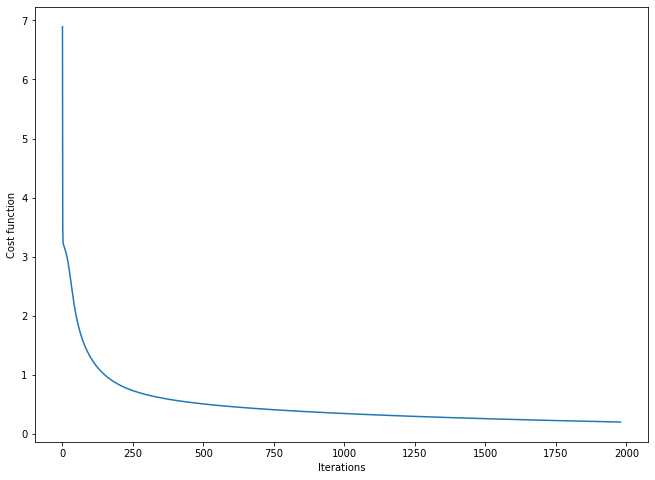

In [15]:
plt.plot(np.arange(1, len(J_val)+1), J_val)
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.gcf().set_size_inches(11, 8)

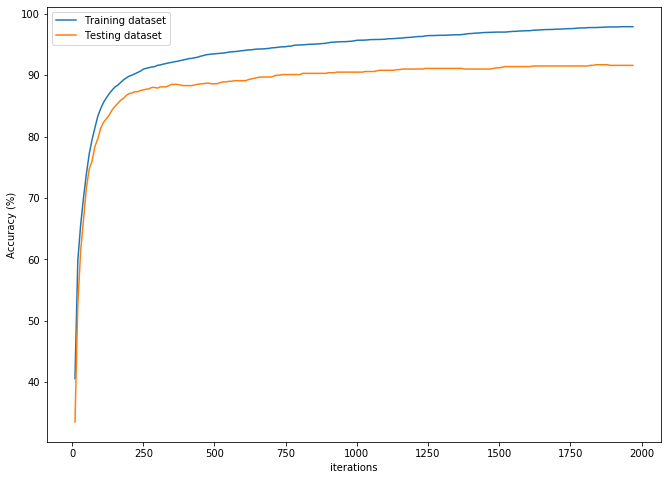

In [16]:
plt.plot(steps, acc_train, label='Training dataset')
plt.plot(steps, acc_test, label='Testing dataset')
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.gcf().set_size_inches(11, 8)

## Save the trained model

In [17]:
np.save('Theta1.npy', Theta1)
np.save('Theta2.npy', Theta2)